In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
import os
import textwrap
import seaborn as sns

COLORS = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897', '#f6bd60', '#e76f51', '#2a9d8f', "#c77dff", "#f7d6e0"]

rads = ["#ea5545", "#e1a692", "#DD7596", '#9A3B3B', "#b30000"]
maroon = ["#900c3f", "#c70039", '#900c3f']
COLORS_20 = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']
semi_balck = '#4F6272'


In [15]:
import matplotlib
plt.rcParams.update(matplotlib.rcParamsDefault)

In [16]:
def abs_percentage_error(A, F):
    abs_errors = [
        abs((a - f) / a)
        for a, f in zip(A, F)
    ]
    return np.mean(abs_errors), np.var(abs_errors)
def abs_percentage_error_by_batch(A, F):
    abs_errors = [
        abs((a-f)/a)
    for a, f in zip(A, F)
    ]
    jumps = list(range(0, len(abs_errors), 512)) + [len(abs_errors)]
    means = [
        np.mean(abs_errors[jumps[i]:jumps[i+1]])
        for i in range(len(jumps)-1)
    ]
    print(means)

    return np.mean(means), np.var(abs_errors)

In [17]:
results_path = "/Volumes/noamaz/modularity/xor/"
local_base_path = '/Users/noamazmon/PycharmProjects/network_modularity'
task_name = 'XOR'
task = "xor"
num_layers = "4"
time_str = dt.now().strftime("%Y-%m-%d-%H-%M-%S")
res_folder = f"{task}_{num_layers}_layers"
plot_path = f"{local_base_path}/plots/xor_multi_arch/{res_folder}"

In [18]:
lgbm_folder_name = 'exp_2023-11-16-17-38-02_nice_features'
n_features = 5

In [19]:
lgb_res_path = f"{results_path}/{res_folder}/lightgbm_feature_selection/{lgbm_folder_name}"
lgb_res_nn_path = f"{lgb_res_path}/teach_archs_regression_feature_selection_results_with_preds"

In [20]:
num_features = []
feature_selection_res = pd.DataFrame()
for file_name in os.listdir(lgb_res_nn_path):
    if 'best.csv' not in file_name:
        continue
    temp = pd.read_csv(f"{lgb_res_nn_path}/{file_name}")
    temp['num_features'] = int(file_name.split('only_')[1].split('_features')[0])
    feature_selection_res = pd.concat([feature_selection_res, temp], ignore_index=True)
feature_selection_res = feature_selection_res.sort_values('num_features')

In [21]:
feature_selection_ind_res = pd.DataFrame()
all_preds = {}
for file_name in os.listdir(lgb_res_nn_path):
    if 'prediction_results.csv' not in file_name:
        continue
    model = pd.read_csv(f"{lgb_res_nn_path}/{file_name}")
    mape, var = abs_percentage_error(model['test_label'], model['test_pred'])
    num_features = int(file_name.split('only_')[1].split('_features')[0])
    all_preds[num_features] = {'model': model, 'mape': mape, 'var': var}
    temp = pd.DataFrame.from_dict({
        'test mape ind': [mape],
        'test mape ind var': [var],
        'num_features': [num_features],
    },
    )
    feature_selection_ind_res = pd.concat([feature_selection_ind_res, temp], ignore_index=True)
feature_selection_res= pd.merge(feature_selection_res  ,feature_selection_ind_res, left_on='num_features',  right_on='num_features')

In [43]:
feature_selection_res

,Unnamed: 0,best ephoc,best mape train,best mape test,best mse train,best mse test,best r2 train,best r2 test,num_features,test mape ind,test mape ind var,mape_ratio_min,mape_ratio_min_inv,r2_ratio_max,mape_reletive_cahnge,r2_reletive_cahnge
0,0,310,0.036963,0.035176,0.000033,0.000033,0.910586,0.915278,1,0.036317,0.001307,0.307493,3.252105,0.922139,2.252105,0.077861
1,0,410,0.029490,0.027943,0.000027,0.000026,0.943081,0.945893,2,0.032236,0.000768,0.346426,2.886618,0.952984,1.886618,0.047016
2,0,481,0.026786,0.025384,0.000024,0.000024,0.953344,0.955011,3,0.027786,0.000792,0.401901,2.488175,0.962170,1.488175,0.037830
3,0,412,0.025012,0.023222,0.000022,0.000022,0.959941,0.961227,4,0.023677,0.000719,0.471639,2.120264,0.968432,1.120264,0.031568
4,0,459,0.020240,0.018872,0.000018,0.000018,0.973835,0.975073,5,0.019024,0.000449,0.587015,1.703534,0.982382,0.703534,0.017618
5,0,469,0.019270,0.018894,0.000018,0.000018,0.975427,0.974991,6,0.021260,0.000500,0.525277,1.903758,0.982300,0.903758,0.017700
6,0,488,0.019228,0.018376,0.000017,0.000017,0.976189,0.976599,7,0.022136,0.000474,0.504481,1.982233,0.983920,0.982233,0.016080
7,0,471,0.018643,0.017809,0.000017,0.000017,0.977488,0.978070,8,0.017675,0.000390,0.631813,1.582747,0.985401,0.582747,0.014599
8,0,477,0.018915,0.017592,0.000017,0.000016,0.978004,0.978973,9,0.030108,0.000481,0.370902,2.696132,0.986311,1.696132,0.013689
9,0,486,0.017339,0.017121,0.000015,0.000016,0.981081,0.980645,10,0.019507,0.000347,0.572469,1.746818,0.987996,0.746818,0.012004


In [29]:
feature_selection_res['mape_ratio_min'] = feature_selection_res['test mape ind'].min() / feature_selection_res[
    'test mape ind']
feature_selection_res['mape_ratio_min_inv'] = feature_selection_res[
    'test mape ind'] / feature_selection_res['test mape ind'].min()
feature_selection_res['r2_ratio_max'] = feature_selection_res['best r2 test'] / feature_selection_res[
   'best r2 test'].max()

feature_selection_res['mape_reletive_cahnge'] = (feature_selection_res[
    'test mape ind'] -feature_selection_res['test mape ind'].min())/ feature_selection_res['test mape ind'].min()
feature_selection_res['r2_reletive_cahnge'] = (feature_selection_res['best r2 test'].max() - feature_selection_res[
    'best r2 test'] )/ feature_selection_res['best r2 test'].max()
feature_selection_res[
    ['mape_reletive_cahnge','r2_reletive_cahnge','mape_ratio_min','mape_ratio_min_inv', 'test mape ind', 'best r2 test',
     'r2_ratio_max', 'num_features']]

,mape_reletive_cahnge,r2_reletive_cahnge,mape_ratio_min,mape_ratio_min_inv,test mape ind,best r2 test,r2_ratio_max,num_features
0,2.252105,0.077861,0.307493,3.252105,0.036317,0.915278,0.922139,1
1,1.886618,0.047016,0.346426,2.886618,0.032236,0.945893,0.952984,2
2,1.488175,0.037830,0.401901,2.488175,0.027786,0.955011,0.962170,3
3,1.120264,0.031568,0.471639,2.120264,0.023677,0.961227,0.968432,4
4,0.703534,0.017618,0.587015,1.703534,0.019024,0.975073,0.982382,5
5,0.903758,0.017700,0.525277,1.903758,0.021260,0.974991,0.982300,6
6,0.982233,0.016080,0.504481,1.982233,0.022136,0.976599,0.983920,7
7,0.582747,0.014599,0.631813,1.582747,0.017675,0.978070,0.985401,8
8,1.696132,0.013689,0.370902,2.696132,0.030108,0.978973,0.986311,9
9,0.746818,0.012004,0.572469,1.746818,0.019507,0.980645,0.987996,10


In [46]:
feature_selection_res[feature_selection_res['test mape ind']==feature_selection_res['test mape ind'].min()]

,Unnamed: 0,best ephoc,best mape train,best mape test,best mse train,best mse test,best r2 train,best r2 test,num_features,test mape ind,test mape ind var,mape_ratio_min,mape_ratio_min_inv,r2_ratio_max,mape_reletive_cahnge,r2_reletive_cahnge
16,0,372,0.010044,0.011156,0.000009,0.00001,0.99409,0.9921,80,0.011167,0.000125,1.0,1.0,0.999536,0.0,0.000464


In [24]:
feature_selection_res['best mape test'][feature_selection_res['best mape test'] ==feature_selection_res['best mape test'].min()].item()

0.0108314711334449

In [41]:
print(round(feature_selection_res['best mape test'].min(), 4))
print(round(feature_selection_res['best r2 test'].max(), 4))

feature_selection_res[feature_selection_res['num_features'].isin((5,30,80))][[
    'best mape train',
    'test mape ind',
    'mape_reletive_cahnge',
    'best r2 train',
    'best r2 test',
    'r2_reletive_cahnge',
    'num_features',
]].round(4)

0.0108
0.9926


,best mape train,test mape ind,mape_reletive_cahnge,best r2 train,best r2 test,r2_reletive_cahnge,num_features
4,0.0202,0.0190,0.7035,0.9738,0.9751,0.0176,5
11,0.0120,0.0127,0.1379,0.9920,0.9910,0.0016,30
16,0.0100,0.0112,0.0000,0.9941,0.9921,0.0005,80


[0.011464230848933082, 0.011946536423607436, 0.01105407637428919, 0.010568492341565452, 0.01157765312260229, 0.011276020075082193, 0.010779037114699328, 0.011755068777027314, 0.01124655368781119, 0.011454068599003279, 0.011855969529666907, 0.011242529898099887, 0.010701406466063094, 0.011121242658067625, 0.01144376080797815, 0.010818978112226058, 0.009856924078517851, 0.010772548490182925, 0.011029333856312898, 0.01123076995121316, 0.011990058012182458]
(0.011199298058339607, 0.00012529942849338305)
[0.01227360750004729, 0.012914973561143689, 0.01301837265408435, 0.012256108680897222, 0.013198552089618476, 0.01258915679454111, 0.011805772607203151, 0.013391592430938322, 0.012663992667297373, 0.012694622702547618, 0.013289826159520245, 0.013412765114472935, 0.012223961871406628, 0.013158639669678143, 0.012506252855513966, 0.012108175115425536, 0.011686614547132013, 0.013006709945036898, 0.013273529820598873, 0.012482966794008024, 0.013702310756844329]
(0.0127456430637122, 0.000154268263

/var/folders/gp/pmfbgzrs0d53zz73ftvp7sg80000gn/T/ipykernel_37589/146327872.py:54: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  plt.tight_layout()


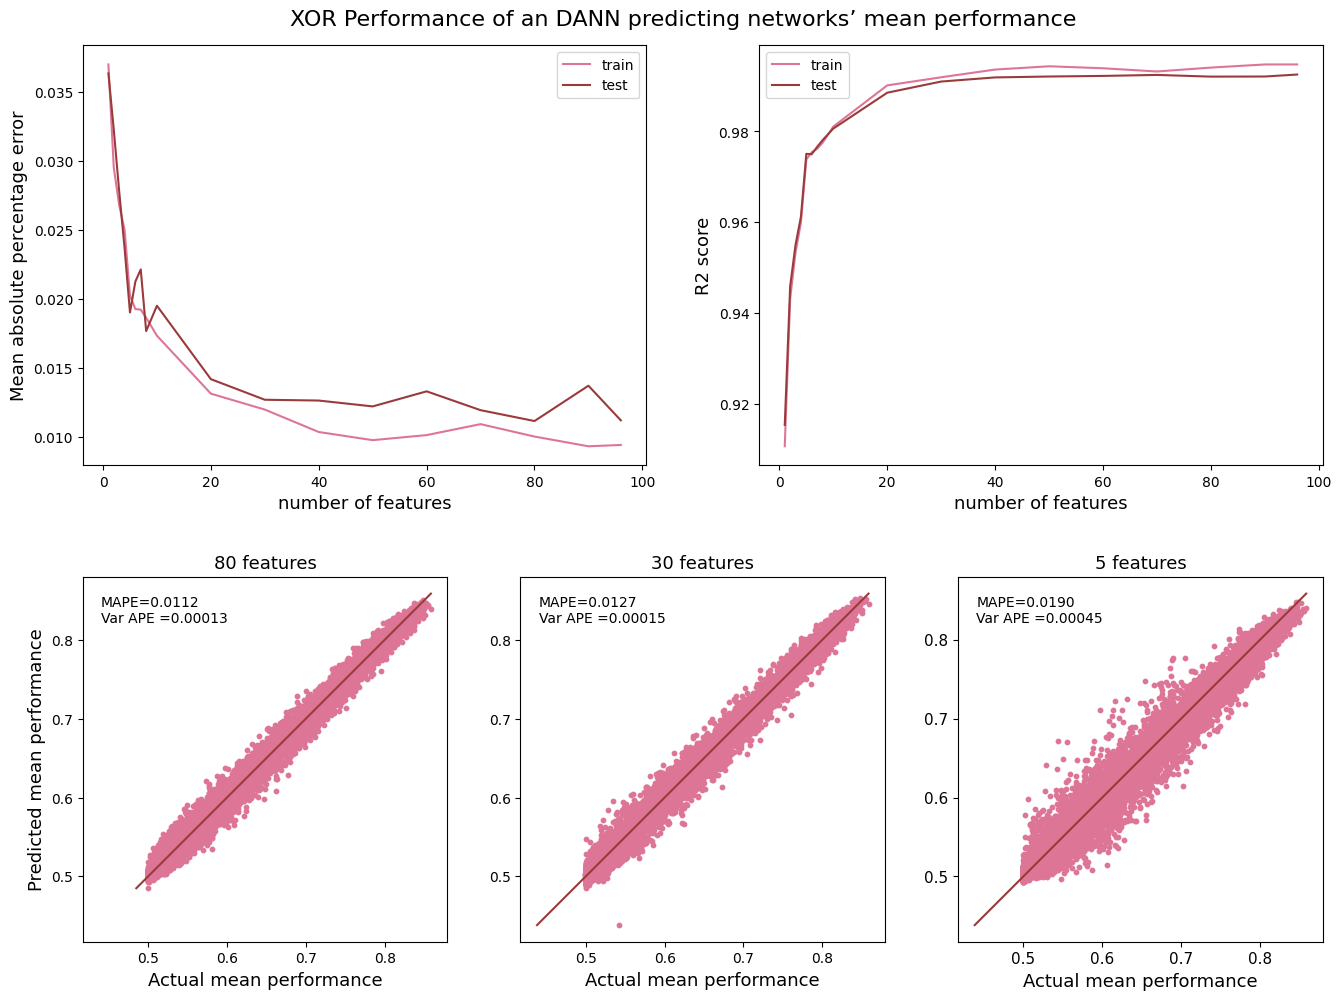

In [50]:
fetureas = [80, 30, 5]
start=100
stop =0
fig = plt.figure(figsize=(16, 12))
ax0 = fig.add_subplot(221)
ax01 = fig.add_subplot(222)
ax1 = fig.add_subplot(234)
ax2 = fig.add_subplot(235, sharex=ax1, sharey=ax1)
ax3 = fig.add_subplot(236, sharex=ax1, sharey=ax1)

for ax, num_fet in zip((ax1, ax2, ax3), fetureas):
    model = all_preds[num_fet]['model']
    start_ = min(model['test_label'].min(), model['test_pred'].min())
    if start_ < start:
        start = start_
    stop_ = max(model['test_label'].max(), model['test_pred'].max())
    if stop_ > stop:
        stop = stop_
    ax.scatter(model['test_label'], model['test_pred'], s=10, c=rads[2])
    textstr = '\n'.join((
        r'MAPE=%.4f' % ( all_preds[num_fet]['mape']),
        r'Var APE =%.5f' % ( all_preds[num_fet]['var'])))
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10, verticalalignment='top', )
    ax.set_box_aspect(1)
    ax.plot(np.linspace(start, stop, 50), np.linspace(start, stop, 50), c=rads[3])
    print(abs_percentage_error_by_batch(model['test_label'],model['test_pred']))
    ax.set_title(
        f"{num_fet} features",
        wrap=True, fontsize=13)
    ax.set_xlabel('Actual mean performance', fontsize=13)

ax1.set_ylabel('Predicted mean performance', fontsize=13)

plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
#plt.suptitle(f"{task.capitalize()} - DANN predicted performance vs. actual performance" ,wrap=True, fontsize=14)
ff=feature_selection_res[feature_selection_res['num_features']!=9]
ax0.plot(ff['num_features'], ff['best mape train'], label='train', c=rads[2])
ax0.plot(ff['num_features'], ff['test mape ind'], label='test', c=rads[3])
ax01.plot(ff['num_features'], ff['best r2 train'], label='train', c=rads[2])
ax01.plot(ff['num_features'], ff['best r2 test'], label='test', c=rads[3])

ax0.set_xlabel('number of features', fontsize=13)
ax0.set_ylabel(f'Mean absolute percentage error', fontsize=13)
ax01.set_xlabel('number of features', fontsize=13)
ax01.set_ylabel(f'R2 score', fontsize=13)
ax0.legend()
ax01.legend()
plt.suptitle(
    f"{task.upper()} Performance of an DANN predicting networks’ mean performance",
    wrap=True, fontsize=16 , y=0.91)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_nn_feature_selection_r2_mape.png")
plt.show()

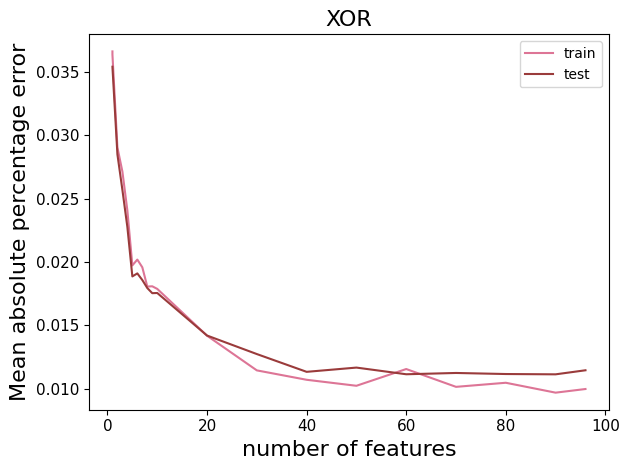

In [18]:
plt.figure()
plt.plot(feature_selection_res['num_features'], feature_selection_res['best mape train'], label='train', c=rads[2])
plt.plot(feature_selection_res['num_features'], feature_selection_res['best mape test'], label='test', c=rads[3])

plt.xlabel('number of features', fontsize=16)
plt.ylabel(f'Mean absolute percentage error', fontsize=16)
plt.legend()
plt.title(
    f"{task.upper()}",
    wrap=True, fontsize=16)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_nn_feature_selection_r2_mape.png")
plt.show()

In [20]:
selected_features_res = pd.read_csv(f"{lgb_res_path}/5_feature_values.csv").drop("Unnamed: 0", axis=1)

In [21]:
selected_feature_names = list(selected_features_res.columns)[:-1]

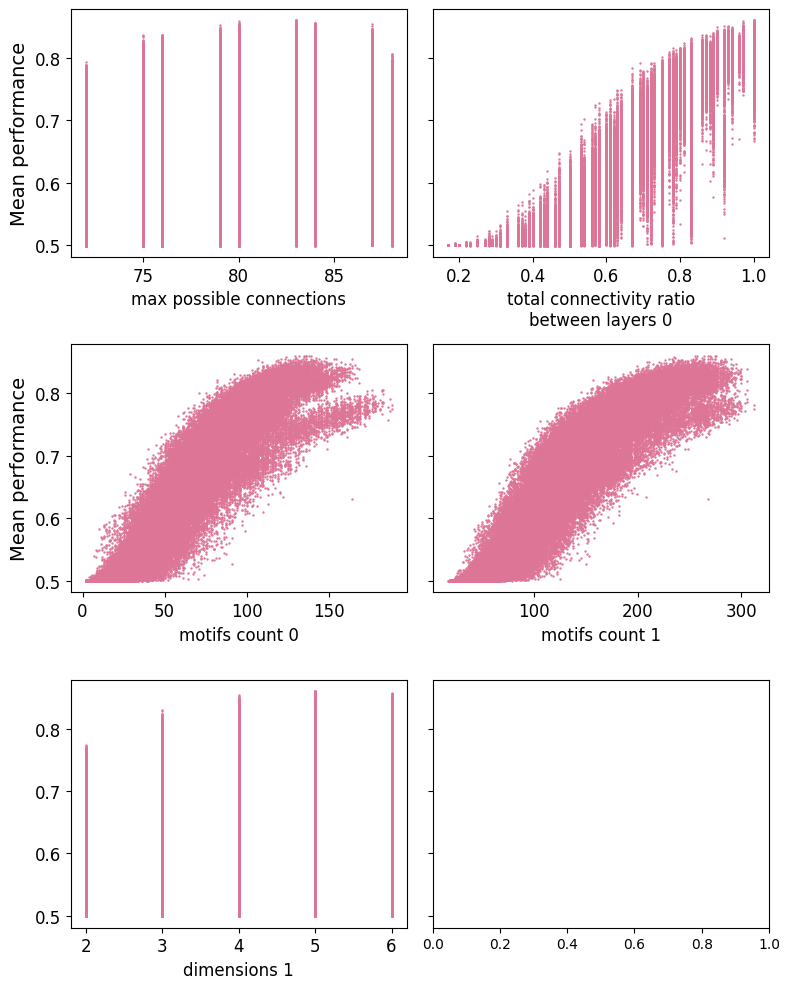

In [25]:
num_columns = int(np.ceil(len(selected_feature_names) / 2))
fig, axs = plt.subplots(num_columns, 2, figsize=(8, 10), sharey='all')
min_x = 1.0
max_x = 0
idxs = []
r, c, = axs.shape
for i in range(r):
    for j in range(c):
        idxs.append((i, j))
for k, (f_name, (i, j)) in enumerate(zip(selected_feature_names, idxs)):
    x_data = selected_features_res[f_name]
    # if  len(set(res[f_name])) < 15:
    #     x_data = x_data + np.random.normal(-0.1, 0.1, len(x_data))
    axs[i, j].scatter(x_data, selected_features_res['label'], color=COLORS[2], s=0.5)
    if 'per_input' in f_name:
        neuron = f_name.split('(')[1].split(' ')[1].split(')')[0]
        f_name = f_name.split('(')[0].replace('num', '#') + neuron
    axs[i, j].set_xlabel(textwrap.fill(f_name.replace('_', ' '), width=30,
                                       break_long_words=False), fontsize=12)
    #axs[i, j].set_title(f"{name}", wrap=True)
    #axs[i, j].set_ylim(0,1)
    axs[i, j].tick_params(axis='x', labelsize=12)
    axs[i, j].tick_params(axis='y', labelsize=12)
axs[1, 0].set_ylabel(f"Mean performance", fontsize=14)
axs[0, 0].set_ylabel(f"Mean performance", fontsize=14)
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_5_fetaures_dist.png")
plt.show()

In [51]:

glob_inds = []
feature_selection_res_by_glob = pd.DataFrame()
for folder_name in os.listdir(f"{results_path}/{res_folder}/lightgbm_feature_selection/by_globality"):
    if 'glob' not in folder_name:
        continue
    glob_ind = folder_name.split('glob_')[1].replace('_', '.')
    glob_inds.append(glob_ind)
    lgb_res_nn_path = f"{results_path}/{res_folder}/lightgbm_feature_selection/by_globality/{folder_name}/teach_archs_regression_feature_selection_results"
    for file_name in os.listdir(lgb_res_nn_path):
        if 'best.csv' not in file_name:
            continue
        temp = pd.read_csv(f"{lgb_res_nn_path}/{file_name}")
        temp['num_features'] = int(file_name.split('only_')[1].split('_features')[0])
        temp['glob_ind'] = glob_ind
        feature_selection_res_by_glob = pd.concat([feature_selection_res_by_glob, temp], ignore_index=True)
feature_selection_res_by_glob = feature_selection_res_by_glob.sort_values(['glob_ind', 'num_features'])

/var/folders/gp/pmfbgzrs0d53zz73ftvp7sg80000gn/T/ipykernel_37589/61789006.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  res_per_glob = feature_selection_res_by_glob[feature_selection_res_by_glob['glob_ind']==ind][feature_selection_res_by_glob['num_features']<=9]


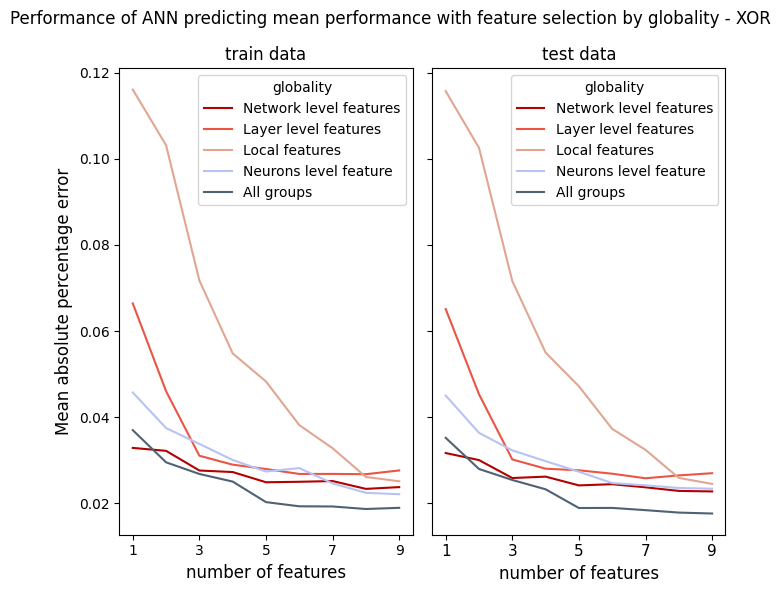

In [60]:
glob_levels =  {
    1: "Network level features",
    0.75: "Layer level features",
    0.5: "Neurons level feature",
    0: "Local features"
}
rads_blues =  ["#b30000", "#ea5545", "#e1a692", COLORS[1],  ]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 6), sharex='all', sharey='all')
for i, ind in enumerate(glob_inds[::-1]):
    res_per_glob = feature_selection_res_by_glob[feature_selection_res_by_glob['glob_ind']==ind][feature_selection_res_by_glob['num_features']<=9]
    ax1.plot(res_per_glob['num_features'], res_per_glob['best mape train'], label=f"{glob_levels[float(ind)]}", c=rads_blues[i])
    ax2.plot(res_per_glob['num_features'], res_per_glob['best mape test'], label=f"{glob_levels[float(ind)]}", c=rads_blues[i])
small_all_fetaures_selcetion = feature_selection_res[feature_selection_res['num_features']<=9]
ax1.plot(small_all_fetaures_selcetion['num_features'], small_all_fetaures_selcetion['best mape train'], label="All groups", c=semi_balck)
ax2.plot(small_all_fetaures_selcetion['num_features'], small_all_fetaures_selcetion['best mape test'], label="All groups", c=semi_balck)
ax1.set_xlabel('number of features', fontsize=12)
ax1.set_ylabel(f'Mean absolute percentage error', fontsize=12)
ax2.set_xlabel('number of features', fontsize=12)
ax1.set_xticks(range(1,10, 2))
ax2.set_xticks(range(1,10, 2))

#ax2.set_ylabel(f'Mean absolute percentage error', fontsize=12)
ax1.legend(title='globality')
ax2.legend(title='globality')
ax1.set_title('train data')
ax2.set_title('test data')
plt.suptitle(
    f"Performance of ANN predicting mean performance with feature selection by globality - {task.upper()}",
    wrap=True, fontsize=12)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.tight_layout()
ax1.grid(False)
ax2.grid(False)

plt.savefig(
    f"{plot_path}/{time_str}_{task}_nn_feature_selection_r2_mape.png")
plt.show()

In [59]:
for i, ind in enumerate(glob_inds[::-1]):
    res_per_glob = feature_selection_res_by_glob[feature_selection_res_by_glob['glob_ind'] == ind][
        feature_selection_res_by_glob['num_features'] == 9]
    try:
        print(glob_levels[float(ind)], round(res_per_glob['best mape test'].item(), 3))
    except:
        continue
print('all', round(feature_selection_res[feature_selection_res['num_features'] == 9]['best mape test'].item(), 3))

Network level features 0.023
Layer level features 0.027
Local features 0.024
Neurons level feature 0.023
all 0.018


/var/folders/gp/pmfbgzrs0d53zz73ftvp7sg80000gn/T/ipykernel_37589/1958468354.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  res_per_glob = feature_selection_res_by_glob[feature_selection_res_by_glob['glob_ind'] == ind][


In [57]:
for i, ind in enumerate(glob_inds[::-1]):
    res_per_glob = feature_selection_res_by_glob[feature_selection_res_by_glob['glob_ind'] == ind][
        feature_selection_res_by_glob['num_features'] == 1]
    try:
        print(glob_levels[float(ind)], round(res_per_glob['best mape test'].item(), 3))
    except:
        continue
print('all', round(feature_selection_res[feature_selection_res['num_features'] == 1]['best mape test'].item(), 3))

Network level features 0.032
Layer level features 0.065
Local features 0.116
Neurons level feature 0.045
all 0.035


/var/folders/gp/pmfbgzrs0d53zz73ftvp7sg80000gn/T/ipykernel_37589/1173731828.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  res_per_glob = feature_selection_res_by_glob[feature_selection_res_by_glob['glob_ind'] == ind][


In [58]:
feature_selection_res_by_glob[feature_selection_res_by_glob['num_features'] == 9]


,Unnamed: 0,best ephoc,best mape train,best mape test,best mse train,best mse test,best r2 train,best r2 test,num_features,glob_ind
15,0,72,0.025082,0.024470,0.000022,0.000023,0.960004,0.959195,9,0
5,0,206,0.022076,0.023359,0.000020,0.000021,0.969140,0.963780,9,0.5
29,0,497,0.027603,0.026962,0.000026,0.000026,0.946413,0.947763,9,0.75
37,0,479,0.023730,0.022726,0.000022,0.000021,0.962285,0.963676,9,1


/var/folders/gp/pmfbgzrs0d53zz73ftvp7sg80000gn/T/ipykernel_56970/2381815300.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  res_per_glob = feature_selection_res_by_glob[feature_selection_res_by_glob['glob_ind']==ind][feature_selection_res_by_glob['num_features']<=50]


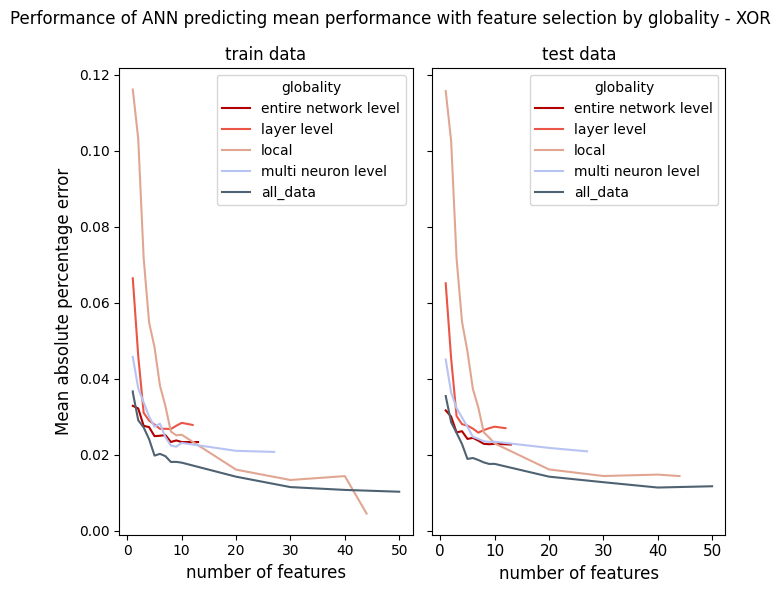

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 6), sharex='all', sharey='all')
for i, ind in enumerate(glob_inds[::-1]):
    res_per_glob = feature_selection_res_by_glob[feature_selection_res_by_glob['glob_ind']==ind][feature_selection_res_by_glob['num_features']<=50]
    ax1.plot(res_per_glob['num_features'], res_per_glob['best mape train'], label=f"{glob_levels[float(ind)]}", c=rads_blues[i])
    ax2.plot(res_per_glob['num_features'], res_per_glob['best mape test'], label=f"{glob_levels[float(ind)]}", c=rads_blues[i])
small_all_fetaures_selcetion = feature_selection_res[feature_selection_res['num_features']<=50]
ax1.plot(small_all_fetaures_selcetion['num_features'], small_all_fetaures_selcetion['best mape train'], label="all_data", c=semi_balck)
ax2.plot(small_all_fetaures_selcetion['num_features'], small_all_fetaures_selcetion['best mape test'], label="all_data", c=semi_balck)
ax1.set_xlabel('number of features', fontsize=12)
ax1.set_ylabel(f'Mean absolute percentage error', fontsize=12)
ax2.set_xlabel('number of features', fontsize=12)

#ax2.set_ylabel(f'Mean absolute percentage error', fontsize=12)
ax1.legend(title='globality')
ax2.legend(title='globality')
ax1.set_title('train data')
ax2.set_title('test data')
plt.suptitle(
    f"Performance of ANN predicting mean performance with feature selection by globality - {task.upper()}",
    wrap=True, fontsize=12)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.tight_layout()
ax1.grid(False)
ax2.grid(False)

plt.savefig(
    f"{plot_path}/{time_str}_{task}_nn_feature_selection_r2_mape_full.png")
plt.show()

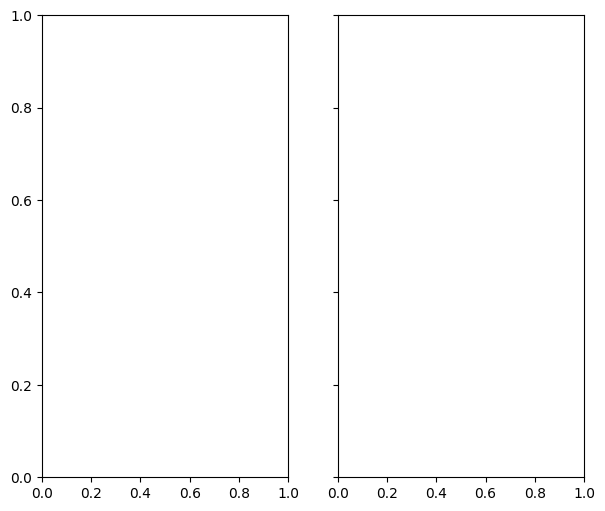

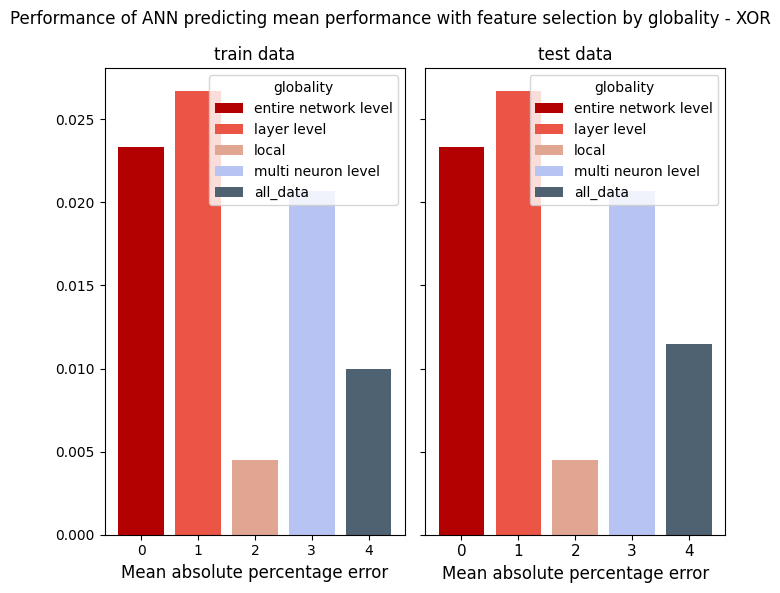

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 6), sharex='all', sharey='all')
for i, ind in enumerate(glob_inds[::-1]):
    res_per_glob = feature_selection_res_by_glob[feature_selection_res_by_glob['glob_ind']==ind]
    ax1.bar(x = i, height=res_per_glob['best mape train'].min(), label=f"{glob_levels[float(ind)]}", color=rads_blues[i])
    ax2.bar(x=i,height=res_per_glob['best mape train'].min(), label=f"{glob_levels[float(ind)]}", color=rads_blues[i])
small_all_fetaures_selcetion = feature_selection_res[feature_selection_res['num_features']==feature_selection_res['num_features'].max()]
ax1.bar(x=i+1,height=small_all_fetaures_selcetion['best mape train'], label="all_data", color=semi_balck)
ax2.bar(x=i+1,height=small_all_fetaures_selcetion['best mape test'], label="all_data", color=semi_balck)
ax1.set_xlabel('number of features', fontsize=12)
ax1.set_xlabel(f'Mean absolute percentage error', fontsize=12)
ax2.set_xlabel(f'Mean absolute percentage error', fontsize=12)

#ax2.set_ylabel(f'Mean absolute percentage error', fontsize=12)
ax1.legend(title='globality')
ax2.legend(title='globality')
ax1.set_title('train data')
ax2.set_title('test data')
plt.suptitle(
    f"Performance of ANN predicting mean performance with feature selection by globality - {task.upper()}",
    wrap=True, fontsize=12)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.tight_layout()
ax1.grid(False)
ax2.grid(False)

plt.savefig(
    f"{plot_path}/{time_str}_{task}_nn_feature_selection_r2_mape_full_hist.png")
plt.show()

In [11]:
model_res_path = f"{results_path}/{res_folder}/lightgbm_feature_selection/{lgbm_folder_name}"
res_pred_vs_label = pd.read_csv(f"{model_res_path}/{n_features}_prediction_results.csv")


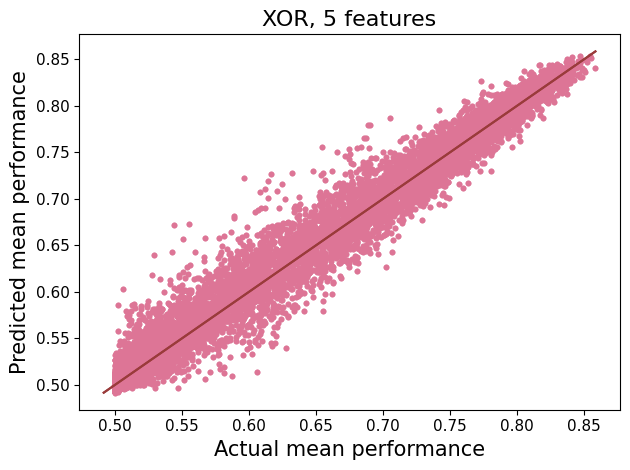

In [15]:
plt.scatter(res_pred_vs_label['test_label'], res_pred_vs_label['test_pred'], c=COLORS[2], s=10)
start = min(res_pred_vs_label['test_label'].min(), res_pred_vs_label['test_pred'].min())
stop = max(res_pred_vs_label['test_label'].max(), res_pred_vs_label['test_pred'].max())
plt.plot(np.linspace(start, stop, 50), np.linspace(start, stop, 50), c=rads[3])
plt.ylabel('Predicted mean performance', fontsize=15)
plt.xlabel('Actual mean performance', fontsize=15)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.title(
    f"{task.upper()}, {n_features} features",
    wrap=True, fontsize=16)
plt.tight_layout()

plt.savefig(f"{plot_path}/{time_str}_nn_model_pred_vs_actual.png")
plt.show()